In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Data/Real-Data/Real_Combine.csv')

df = df.dropna()

X = df.iloc[:,:-1]  ##Independent Features, 
Y = df.iloc[:,-1] ##Dependent Features,



In [3]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,Y)

ExtraTreesRegressor()

In [4]:
X.head()

,T,TM,Tm,SLP,H,VV,V,VM
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2


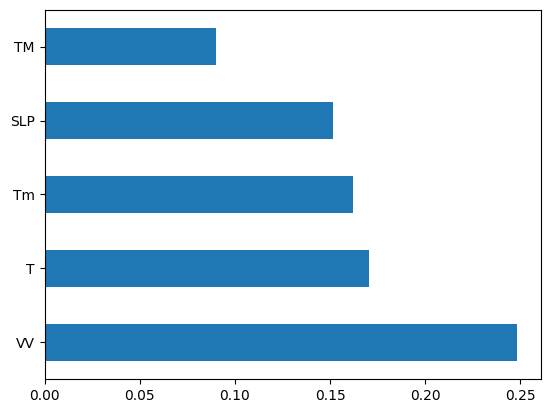

In [5]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test , Y_train, Y_test = train_test_split(X,Y, test_size=0.3,random_state=0)
from sklearn.linear_model import LinearRegression
Regressor = LinearRegression()
Regressor.fit(X_train,Y_train)

LinearRegression()

In [7]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(Regressor,X,Y,cv=5)
score.mean()

0.46724362258523316

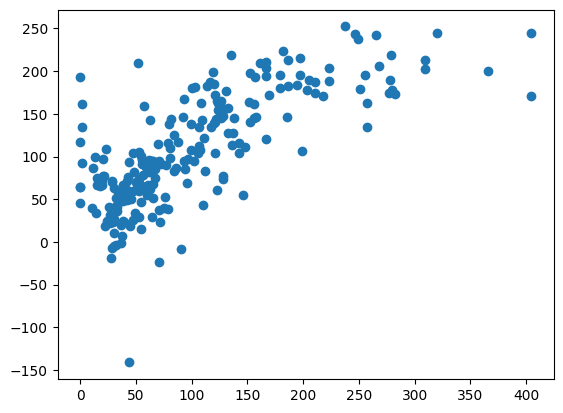

In [8]:
prediction = Regressor.predict(X_test)
plt.scatter(Y_test,prediction)

In [9]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(Y_test, prediction))
print('MSE:', metrics.mean_squared_error(Y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, prediction)))

MAE: 40.2833553713294
MSE: 3057.664128674137
RMSE: 55.29614931144968


In [10]:
import pickle 
file = open('regression_model.pkl', 'wb')
pickle.dump(Regressor, file)